In [2]:
pip install numpy pandas matplotlib tensorflow scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ACER\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 435.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.1/15.8 MB 1.7 MB/s eta 0:00:10
   ---------------------------------------- 0.2/15.8 MB 1.5 MB/s eta 0:00:11
    --------------------------------------- 0.3/15.8 MB 2.0 MB/s eta 0:00:08
   - --------------------------

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   #because they are densely connected

In [26]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [8]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [10]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [11]:
data.shape

(1000, 5)

In [12]:
data.iloc[5]

temperature            18.899863
humidity               59.527002
wind_speed             15.187965
solar_irradiance      849.547339
energy_consumption    170.678465
Name: 5, dtype: float64

In [13]:
data.corr(method='pearson') 

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
temperature,1.000000,0.029310,0.014518,-0.029424,0.034785
humidity,0.029310,1.000000,0.027262,-0.005791,0.032911
wind_speed,0.014518,0.027262,1.000000,-0.013560,-0.008858
solar_irradiance,-0.029424,-0.005791,-0.013560,1.000000,-0.044812
energy_consumption,0.034785,0.032911,-0.008858,-0.044812,1.000000


In [24]:
data.head(10).style.highlight_max(color='lightblue', axis=0) 

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261
5,18.899863,59.527002,15.187965,849.547339,170.678465
6,16.452090,61.536594,8.994797,915.478354,212.483627
7,36.654404,70.951739,15.534211,110.941094,233.805012
8,30.027875,34.980081,1.307323,706.617927,355.863748
9,32.701814,49.365498,9.751424,146.652219,75.506194


In [27]:
x=data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y=data['energy_consumption'].values

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  #same accuracy on diff layers


In [30]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
y_test=scaler.transform(x_test)

In [31]:
model=Sequential([Dense(64,activation='relu',input_shape=(x_train.shape[1],)),Dense(32,activation='relu'),
                 Dense(1)])   #64,32, nuerons

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])    

In [34]:
history=model.fit(x_train,y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 89008.2578 - mae: 268.5265


In [37]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)
#

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 89127.4844 - mae: 269.0519 - val_loss: 83320.9531 - val_mae: 258.2757
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 89506.2578 - mae: 268.6111 - val_loss: 82611.5781 - val_mae: 256.8875
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 85618.0547 - mae: 262.4054 - val_loss: 81483.2734 - val_mae: 254.6666
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 89246.3828 - mae: 270.0385 - val_loss: 79718.3750 - val_mae: 251.1543
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 86326.2812 - mae: 263.6203 - val_loss: 77167.1719 - val_mae: 245.9854
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84639.1562 - mae: 262.0285 - val_loss: 73629.9219 - val_mae: 238.6343
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78095.5469 - mae: 247.4175 - val_loss: 69100.8906 - val_mae: 228.8755
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 73446.0078 - mae: 239.0208 - val_loss:

In [39]:
test_loss,test_mae = model.evaluate(x_test,y_test,)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

ValueError: Cannot take the length of shape with unknown rank.

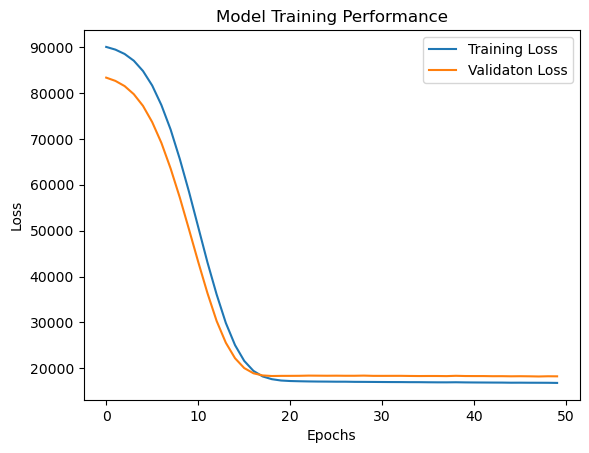

In [40]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validaton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [41]:
predictions=model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[34626.254],
       [50097.48 ],
       [59631.51 ],
       [36621.168],
       [14132.818],
       [52960.082],
       [ 6951.461],
       [53758.445],
       [55571.12 ],
       [50297.355],
       [33621.48 ],
       [61568.19 ],
       [60194.207],
       [48134.2  ],
       [17015.596],
       [56257.215],
       [33094.594],
       [20190.318],
       [49895.87 ],
       [51391.656],
       [39627.375],
       [11402.958],
       [41334.605],
       [50852.19 ],
       [16175.092],
       [20343.809],
       [50686.848],
       [12920.608],
       [60278.723],
       [41442.945],
       [22480.732],
       [11190.421],
       [19460.58 ],
       [49843.895],
       [20337.62 ],
       [13283.761],
       [29447.486],
       [30987.412],
       [28649.889],
       [62203.52 ],
       [15376.517],
       [63279.766],
       [48181.63 ],
       [22643.303],
       [53816.188],
       [35498.598],
       [64585.285],
       [39915.098],
       [61038.805],
       [13764.709],


ValueError: x and y must be the same size

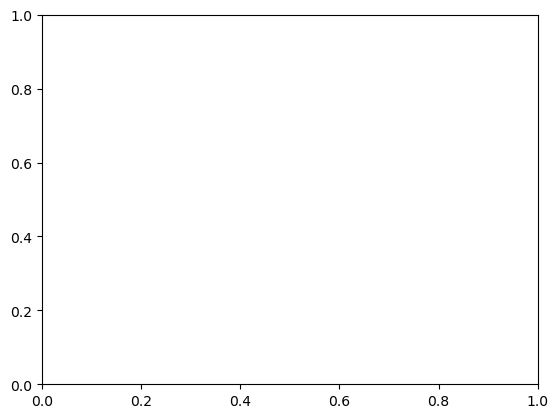

In [44]:
plt.scatter(y_test,predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [45]:
print(x_test.shape)
print(y_test.shape)


(200, 4)
(200, 4)


In [46]:
import numpy as np
x_test = np.array(x_test)
y_test = np.array(y_test)


In [47]:
print(model.input_shape)  # Expected input shape
print(x_test.shape)       # Current shape


(None, 4)
(200, 4)


In [48]:
x_test = x_test[~np.isnan(x_test)]
y_test = y_test[~np.isnan(y_test)]


In [49]:
test_loss,test_mae = model.evaluate(x_test,y_test,)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None